## What Is Pandas?

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
  - Generalization of a vector (vectors have integer indexes, series can have any kind of index)
  - More structured and efficient than a dictionary (elements of a series are ordered and optimized for sequential processing) 
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Almost all libraries for EDA and ML first require loading a data set into a `DataFrame`
  - One row per "observation"
  - One column per "attribute"

### Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

  - users.index -- accesses the `index` attribute -- note there are no parentheses. attributes are not callable
  - users.head() -- calls the `head` method (since there are open/closed parentheses)
  - users.head(10) -- calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
  - users.head(n=10) -- calls the `head` method, setting the named parameter `n` to have a value of `10`.

In [1]:
# Load Pandas into Python
import pandas as pd

In [3]:
# Use the read_table function to load the file 'user.tbl' as a data frame
# Store it in a variable users

users = pd.read_table('user.tbl', sep='|') 


In [4]:
# What is the type of this object
type(users)

pandas.core.frame.DataFrame

In [5]:
# How does it print?
print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
7          8   36      M  administrator    05201
8          9   29      M        student    01002
9         10   53      M         lawyer    90703
10        11   39      F          other    30329
11        12   28      F          other    06405
12        13   47      M       educator    29206
13        14   45      M      scientist    55106
14        15   49      F       educator    97301
15        16   21      M  entertainment    10309
16        17   30      M     programmer    06355
17        18   35      F          other    37212
18        19   40      M      librarian    02138
19        20   42   

In [7]:
# What is its size and shape?
print(len(users))
print(users.shape)

943
(943, 5)


In [9]:
# Display some rows from the beginning and end of the data frame
users.head(5)
users.tail(5)

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [12]:
# What are the row and column indexes?
print(users.index)
print(users.columns)

RangeIndex(start=0, stop=943, step=1)
Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')


In [14]:
# Use the info method to get a concise summary of the data frame
# Use the describe method to get a different summary
print(users.info())
print()
print(users.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB
None

          user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000


In [19]:
# Retrieve a column in two ways:  bracket notation and attribute notation
# What is the data type of a column?
users.age
users['age']
type(users['age'])
type(users[['age', 'gender']])

pandas.core.frame.DataFrame

In [21]:
# Do vector operations on a column:  min, max, mean
(users.age.min(), users.age.max())
users.age + users.user_id

0       25
1       55
2       26
3       28
4       38
5       48
6       64
7       44
8       38
9       63
10      50
11      40
12      60
13      59
14      64
15      37
16      47
17      53
18      59
19      62
20      47
21      47
22      53
23      45
24      64
25      75
26      67
27      60
28      70
29      37
      ... 
913    958
914    965
915    943
916    939
917    958
918    944
919    950
920    941
921    951
922    944
923    953
924    943
925    975
926    950
927    949
928    973
929    958
930    991
931    990
932    961
933    995
934    977
935    960
936    985
937    976
938    965
939    972
940    961
941    990
942    965
Length: 943, dtype: int64

In [25]:
# Get a count of each distinct data value for the attribute gender
users.gender.value_counts().index

Index(['M', 'F'], dtype='object')

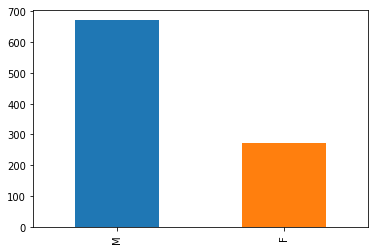

In [26]:
# Use a bar chart to show the counts for gender
from matplotlib import pyplot as plt
%matplotlib inline
users.gender.value_counts().plot(kind='bar')

In [ ]:
# Use value_counts to get counts on a numeric attribute -- age

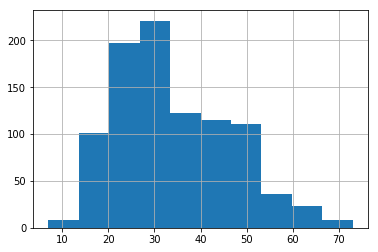

In [30]:
# Maybe a histogram would work better for numeric data
users.age.hist()

In [35]:
# Create a data frame containing only the users under the age of 20
#  (both verbosely, and in one line)
mask = users.age < 20
users[mask]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755


In [36]:
# Get the count by occupation of users under the age of 20
users[users.age < 20].occupation.value_counts()

student          64
other             4
none              3
entertainment     2
writer            2
artist            1
salesman          1
Name: occupation, dtype: int64

In [ ]:
# Filter for all male users under the age of 20

In [ ]:
# Filter for all users under 20 or over 60

In [ ]:
# Create a data frame containing only columns age and occupation

In [ ]:
# Select by occupation:  either 'doctor' or 'lawyer'

In [ ]:
# Produce a sorted vector of user ages

In [ ]:
# Sort the data frame by age
#   in ascending order

In [ ]:
# Sort by occupation then by age within occupation

In [ ]:
# Rename the column zip_code to be postal_code

In [ ]:
# Create a new column salary; populate it with random numbers 
#   normally distributed with a mean of 100000 and a standard deviation of 1000

In [ ]:
# Make all the salary values integers

In [ ]:
# Create the column dollars_per_year which is salary divided by age

In [ ]:
# Drop the column dollars_per_year

In [ ]:
# Compute average salary by occupation

In [ ]:
# Create a new column age_in_months 

In [ ]:
# Change the coding of gender to 0 for male, 1 for female
users['is_male'] = users.gender.map({'F':0, 'M':1})

In [ ]:
# Replace the occupation 'other' to 'unknown'

In [256]:
# Change the data type of zip_code to integer


In [ ]:
# Create a new data frame with a random sample of 50% of the rows in the original

In [ ]:
# Write the new data frame to a file user_sample.csv --
#  make it comma delimited, and no header line